In [2]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns6

In [3]:
file_events = 'events.csv'
Dataset_events = pd.read_csv(file_events)
Dataset_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [4]:
file_info = 'ginf.csv'
Dataset_info =  pd.read_csv(file_info)
Dataset_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [6]:
# Since we are interested in points scored, let's start by looking at all the possibilities
pie = Dataset_events[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'Total'})
pie*

,shot_outcome,Total
0,1.0,78014
1,2.0,92827
2,3.0,54082
3,4.0,3575


In [7]:
# Make more clear the data
pie['shot_outcome'] = pie['shot_outcome'].astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the soccer poles'})
pie

,shot_outcome,Total
0,On Target,78014
1,Off Target,92827
2,Blocked,54082
3,Hit the soccer poles,3575


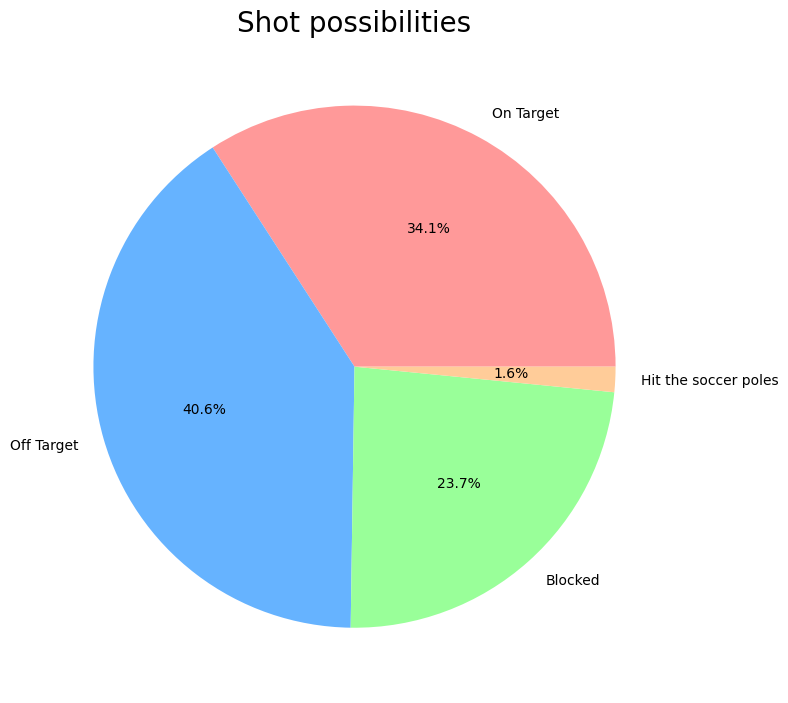

In [8]:
#Data visualisation
fig, ax = plt.subplots(figsize=[8,8])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['Total'], autopct="%.1f%%", labels=pie['shot_outcome'], colors=colors)
plt.title("Shot possibilities", fontsize=20)
plt.tight_layout()

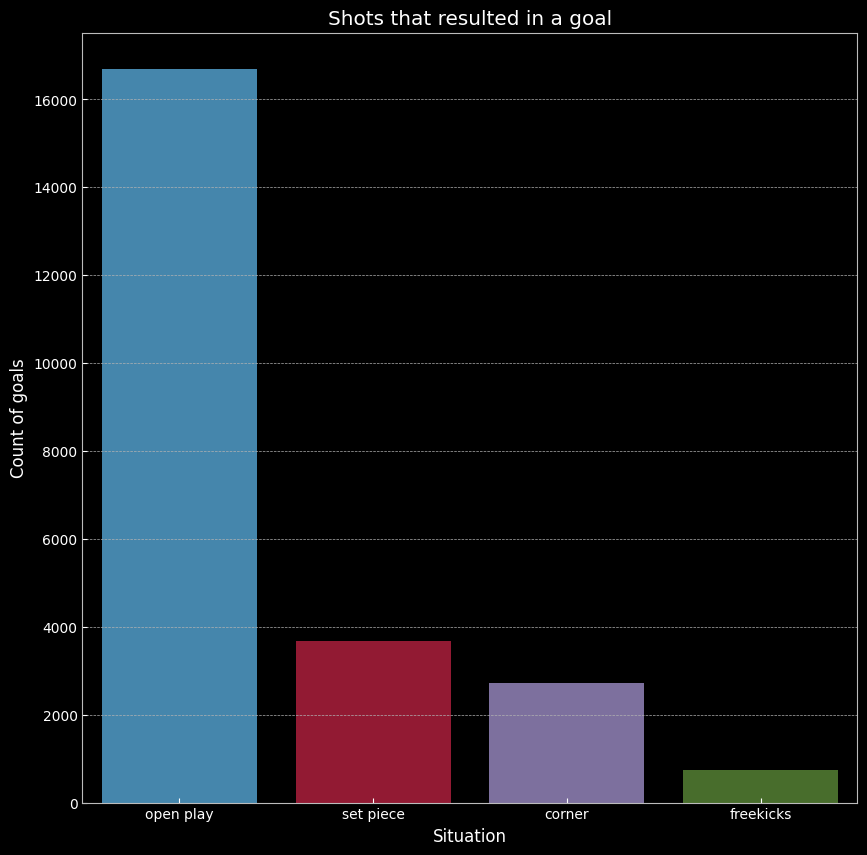

In [30]:
# Sitiation that resultet in a goal
Shots_dataset = Dataset_events[['situation', 'shot_outcome', 'is_goal']]

# Filter the dataframe to only include shots where the outcome is 1
shots_outcome_1 = Shots_dataset[Shots_dataset['shot_outcome'] == 1]
shots_outcome_2 = shots_outcome_1[shots_outcome_1['is_goal'] == 1]

# Count the number of shots for each situation
shots_count = shots_outcome_2.groupby('situation').size().reset_index(name='counts').replace({1: 'open play', 2: 'set piece', 3: 'corner', 4: 'freekicks'})
# Create the bar chart
sns.barplot(x='situation', y='counts', data=shots_count)

# Add a title and labels to the chart
plt.title('Shots that resulted in a goal')
plt.xlabel('Situation')
plt.ylabel('Count of goals')

# Show the chart
plt.show()

In [9]:
# Let's look about the parameter shot_place
bar = Dataset_events[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'Total'})
bar['shot_place'] = bar['shot_place'].astype(int)
bar['shot_place']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
Name: shot_place, dtype: int32

In [15]:
# Make the informations more clear 
bar['shot_place'] = bar['shot_place'].replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})
bar = bar.sort_values(by=['Total'])
bar

,shot_place,Total
6,Hits the bar,3575
10,Top centre of the goal,5402
11,Top left corner,5983
0,Bit too high,6079
12,Top right corner,6306
9,Too high,15798
5,High and wide,15910
2,Bottom left corner,18260
3,Bottom right corner,18748
4,Centre of the goal,25079


Text(0.5, 1.0, 'Shot Placement')

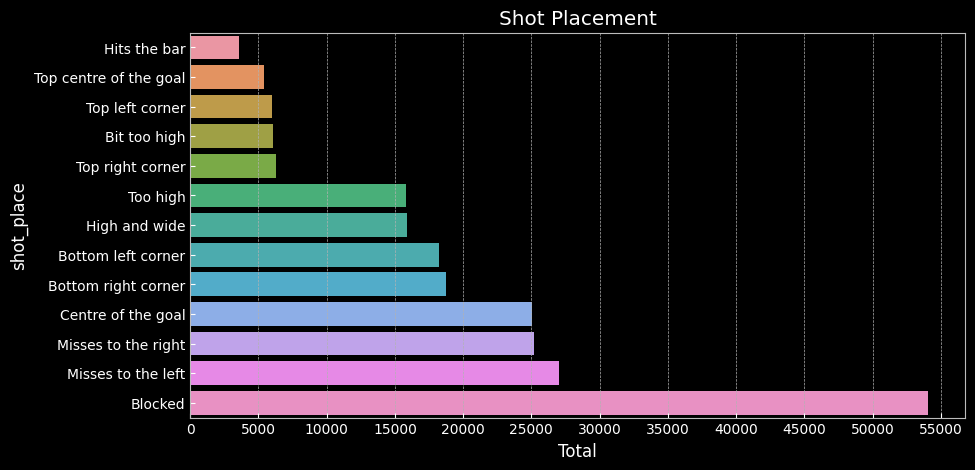

In [16]:
# Data visualisation
fig, ax = plt.subplots(figsize=[10,5])
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(5,5))
labels = bar['shot_place']
ax = sns.barplot(x=bar['Total'], y=labels)
ax.set_xticks(np.arange(0,57000,5000))
plt.title("Shot Placement")

In [19]:
# Let's have a closer look about goals
goals = Dataset_events[Dataset_events['is_goal'] == True]

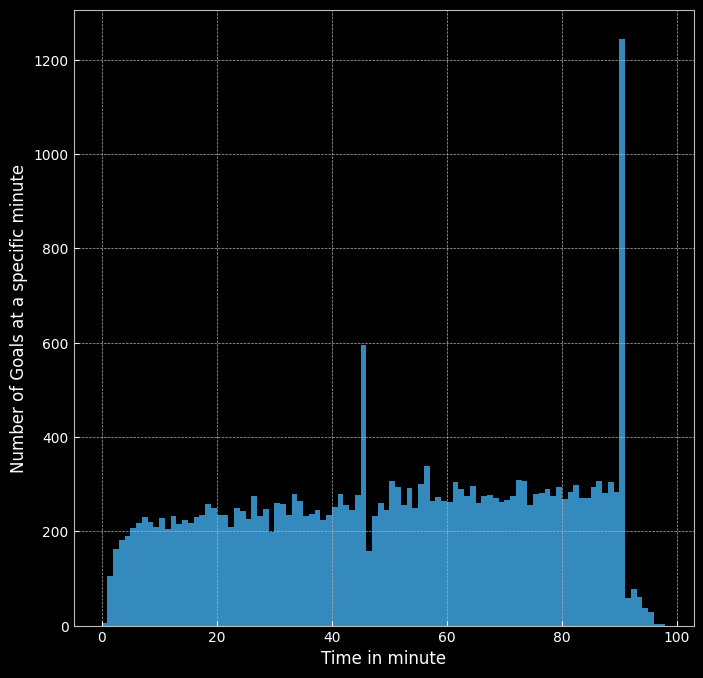

In [20]:
# Data visualation 
plt.figure(figsize=(8,8))
plt.hist(goals.time,goals.time.max())
plt.xlabel("Time in minute")
plt.ylabel("Number of Goals at a specific minute")
plt.show()

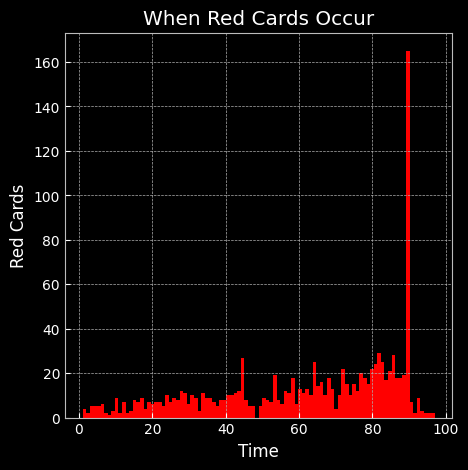

In [21]:
# Data visualation 
Dataset_events['event_type'] = Dataset_events['event_type'].replace({1:'Attempt', 2:'Corner', 3:'Foul', 4:'Yellow card', 5:'Second yellow card', 6:'Red card', 7:'Substitution', 8:'Free kick won', 9:'Offside', 10:'Hand ball', 11:'Penalty conceded'})
plt.hist(Dataset_events[Dataset_events['event_type'] == 'Red card'].time, goals.time.max(), color="red")
plt.xlabel("Time")
plt.ylabel("Red Cards")
plt.title("When Red Cards Occur")
plt.show()


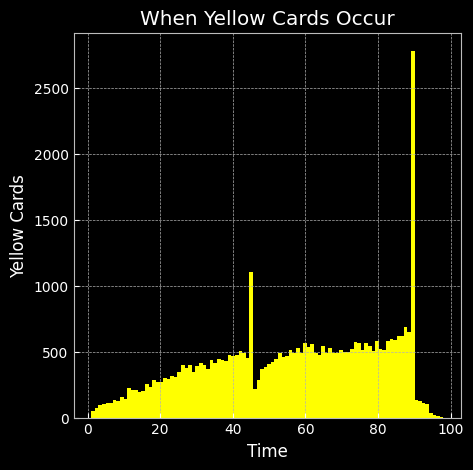

In [22]:
# Data visualation 
plt.hist(Dataset_events[Dataset_events['event_type'] == 'Yellow card'].time, goals.time.max(), color="Yellow")
plt.xlabel("Time")
plt.ylabel("Yellow Cards")
plt.title("When Yellow Cards Occur")
plt.show()

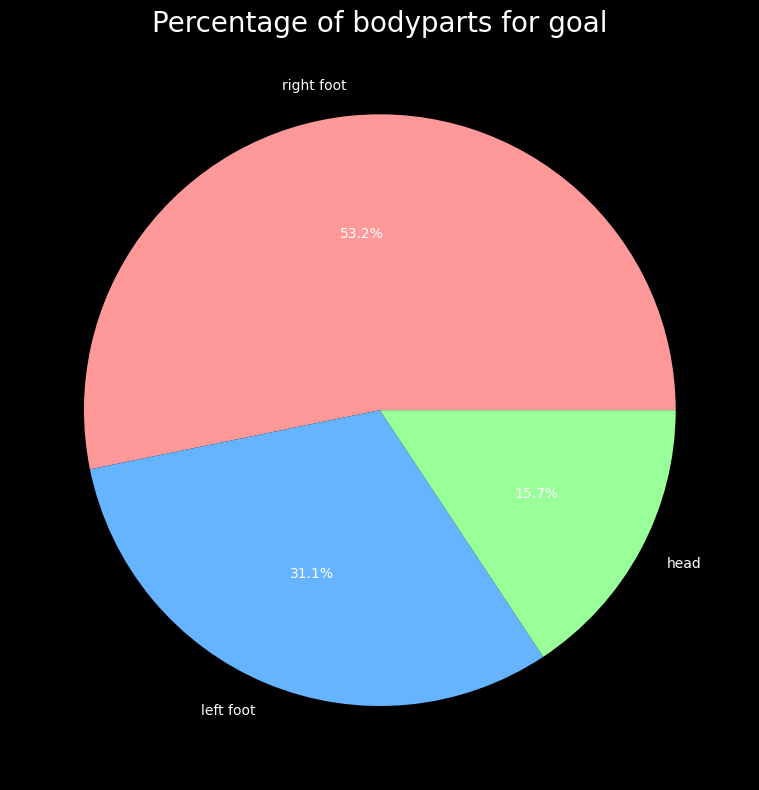

In [27]:
# Data visualation 
pie = Dataset_events[['bodypart', 'id_event']].groupby('bodypart').count().reset_index().rename(columns={'id_event': 'Total'})
pie.bodypart = pie.bodypart.replace({1:'right foot', 2:'left foot', 3:'head'})
fig, ax = plt.subplots(figsize=[8,8])
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(x=pie['Total'], autopct="%.1f%%", labels=pie.bodypart, colors=colors)
plt.title("Percentage of bodyparts for goal", fontsize=20)
plt.tight_layout()

#Maybe more right leg than leg leg but no data about it... but 

In [25]:
# Look about the parameter location on the field 
bar = Dataset_events[['location', 'id_event']].groupby('location').count().reset_index().rename(columns={'id_event': 'Total'})
bar['location'] = bar['location'].astype(int)
bar['location'] = bar['location'].replace({1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', 4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', 7:'Difficult angle on the left', 8:'Difficult angle on the right', 9:'Left side of the box', 10:'Left side of the six yard box', 11:'Right side of the box', 12:'Right side of the six yard box', 13:'Very close range', 14:'Penalty spot', 15:'Outside the box', 16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards', 19:'Not recorded'})
bar = bar.sort_values(by=['Total'])

Text(0.5, 1.0, 'Total of goals according to the location')

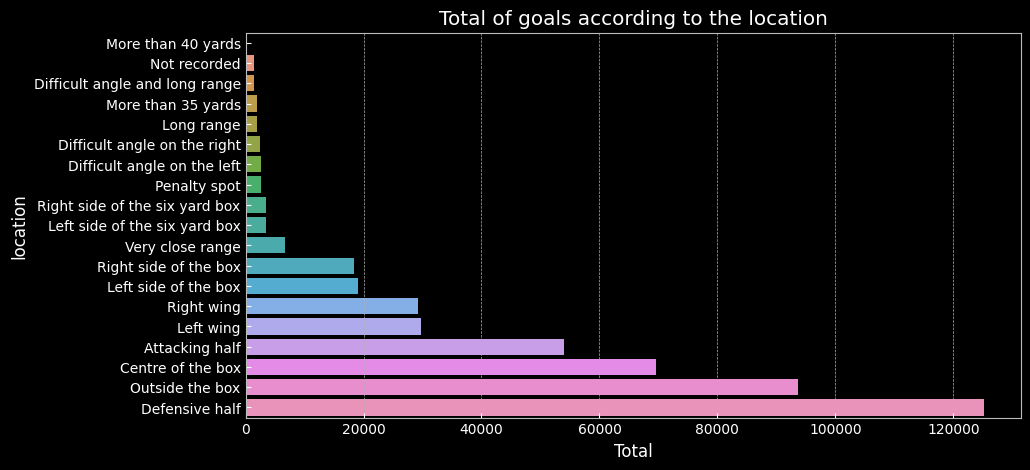

In [28]:
# Data visualisation
fig, ax = plt.subplots(figsize=[10,5])
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(10,10))
labels = bar['location']
ax = sns.barplot(x=bar['Total'], y=labels)
plt.title("Total of goals according to the location")